In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import functions as f

In [2]:
# df = pd.read_csv('../../result/radius0.1/same_period_maxlength/type20_radius0.1_period0.9_maxlength1.9.csv')

In [195]:
df = pd.read_csv('../../result/type20_radius0.1_interval0.6_maxlength1.9_epsilon0.csv')

In [196]:
df.size

219912

In [197]:
df.head()

,Time,sphere_pos_0_x,sphere_pos_0_y,sphere_pos_0_z,sphere_pos_1_x,sphere_pos_1_y,sphere_pos_1_z,sphere_pos_2_x,sphere_pos_2_y,sphere_pos_2_z,...,arm_energy_consumption_0,arm_force_1,input_action_1,arm_energy_consumption_1,arm_force_2,input_action_2,arm_energy_consumption_2,arm_length_0,arm_length_1,arm_length_2
0,0.0,0.577000,0.000000e+00,0,-0.289000,0.5000,0,-0.289000,-0.5000,0,...,0.000000,0.000000,1,0.000000,0.000000,-1,0.00000,1.00000,1.00000,1.000
1,0.1,0.654512,-3.885780e-19,0,-0.325530,0.4995,0,-0.325530,-0.4995,0,...,0.095367,0.920140,1,0.095367,-0.364919,-1,0.00163,1.09899,1.09899,0.999
2,0.2,0.729738,-5.551120e-20,0,-0.361365,0.4995,0,-0.361365,-0.4995,0,...,0.089460,0.872049,1,0.089460,-0.319094,-1,0.00000,1.19900,1.19900,0.999
3,0.3,0.803430,-4.718450e-19,0,-0.396789,0.4995,0,-0.396789,-0.4995,0,...,0.085312,0.836191,1,0.085312,-0.284306,-1,0.00000,1.29901,1.29901,0.999
4,0.4,0.875949,8.326670e-20,0,-0.431929,0.4995,0,-0.431929,-0.4995,0,...,0.082165,0.808503,1,0.082165,-0.256889,-1,0.00000,1.39902,1.39902,0.999


In [198]:
df.columns

Index(['Time', 'sphere_pos_0_x', 'sphere_pos_0_y', 'sphere_pos_0_z',
       'sphere_pos_1_x', 'sphere_pos_1_y', 'sphere_pos_1_z', 'sphere_pos_2_x',
       'sphere_pos_2_y', 'sphere_pos_2_z', 'arm_force_0', 'input_action_0',
       'arm_energy_consumption_0', 'arm_force_1', 'input_action_1',
       'arm_energy_consumption_1', 'arm_force_2', 'input_action_2',
       'arm_energy_consumption_2', 'arm_length_0', 'arm_length_1',
       'arm_length_2'],
      dtype='object')

In [199]:
df['centroid_x'] = (df['sphere_pos_0_x'] + df['sphere_pos_1_x'] + df['sphere_pos_2_x']) / 3.0
df['centroid_y'] = (df['sphere_pos_0_y'] + df['sphere_pos_1_y'] + df['sphere_pos_2_y']) / 3.0
df['centroid_z'] = (df['sphere_pos_0_z'] + df['sphere_pos_1_z'] + df['sphere_pos_2_z']) / 3.0

<IPython.core.display.Javascript object>


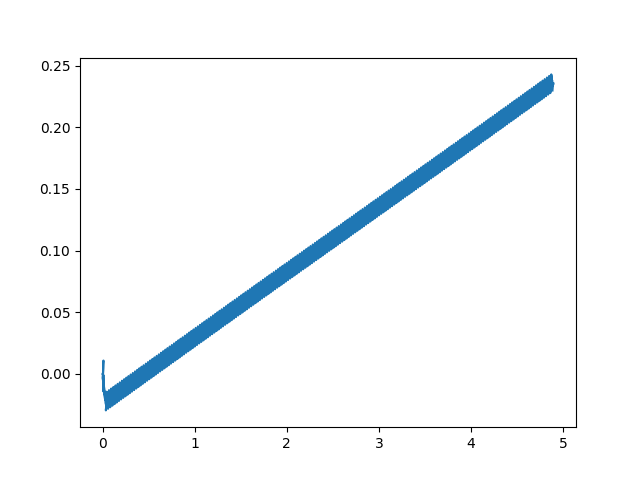

In [200]:
%matplotlib notebook

fig, ax = plt.subplots(1,1)

ax.plot(df['centroid_x'], df['centroid_y'])
plt.show()

In [201]:
df_action = df[['input_action_0', 'input_action_1', 'input_action_2', ]]
df_arm_length = df[['arm_length_0', 'arm_length_1', 'arm_length_2', ]]

In [202]:
df_action.shape, df_arm_length.shape

((9996, 3), (9996, 3))

In [203]:
data = df_action.values
data.shape

(9996, 3)

In [204]:
data

array([[ 1,  1, -1],
       [ 1,  1, -1],
       [ 1,  1, -1],
       ...,
       [-1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1]])

<IPython.core.display.Javascript object>


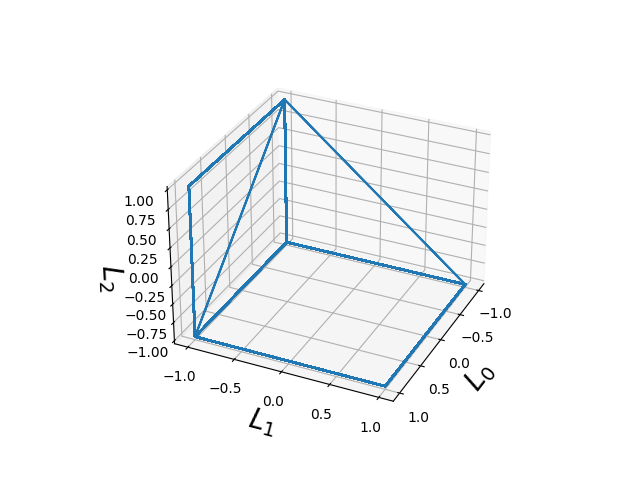

In [205]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$L_0$', fontsize=20)
ax.set_ylabel(r'$L_1$', fontsize=20)
ax.set_zlabel(r'$L_2$', fontsize=20)
"""
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
"""
ax.view_init(elev=30, azim=25)

data_for_plot = data.T.copy()
ax.plot(data_for_plot[0], data_for_plot[1], data_for_plot[2])

In [206]:
flag = 0

if flag == 0:
    clipped = f.clipOne(data)
elif flag == 1:
    clipped = np.round(data, 0)
elif flag == 2:
    clipped = data.copy()
clipped.shape
clipped.shape

(9996, 3)

In [207]:
non_overlapped = f.deleteOverlap(clipped)
non_overlapped.shape

(1666, 3)

<IPython.core.display.Javascript object>


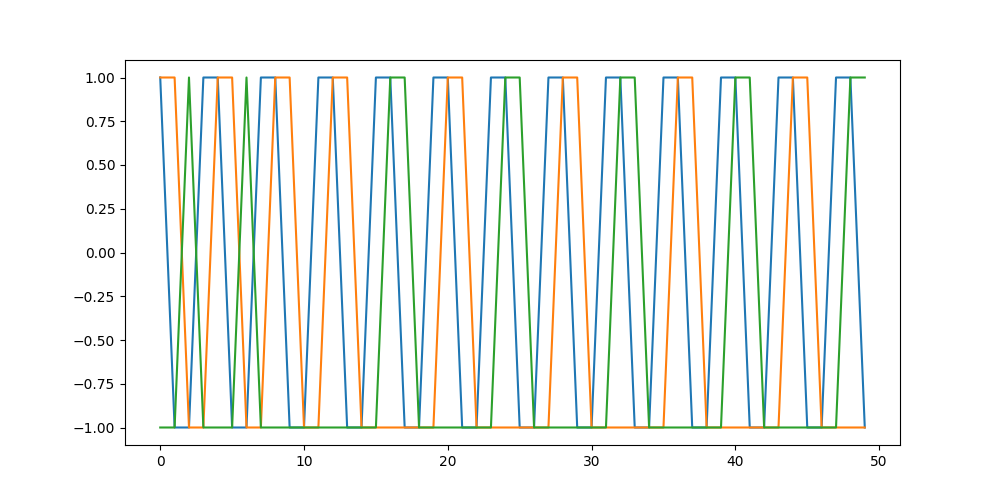

In [209]:
%matplotlib notebook
max_t = 50
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(range(max_t), non_overlapped[:max_t,0], )
ax.plot(range(max_t), non_overlapped[:max_t,1], )
ax.plot(range(max_t), non_overlapped[:max_t,2], )
plt.show()

In [210]:
non_overlapped.shape

(1666, 3)

In [218]:
transitions = f.countTuples(non_overlapped)

In [228]:
f.countTuples(non_overlapped[:20])

{(1.0, 1.0, -1.0): {'count': 4, 'next': {(-1.0, 1.0, -1.0): 4}},
 (-1.0, 1.0, -1.0): {'count': 4,
  'next': {(-1.0, -1.0, 1.0): 2, (-1.0, -1.0, -1.0): 2}},
 (-1.0, -1.0, 1.0): {'count': 3,
  'next': {(1.0, -1.0, -1.0): 2, (-1.0, -1.0, -1.0): 1}},
 (1.0, -1.0, -1.0): {'count': 4,
  'next': {(1.0, 1.0, -1.0): 3, (1.0, -1.0, 1.0): 1}},
 (-1.0, -1.0, -1.0): {'count': 3, 'next': {(1.0, -1.0, -1.0): 3}},
 (1.0, -1.0, 1.0): {'count': 1, 'next': {(-1.0, -1.0, 1.0): 1}}}

In [220]:
f.countTuples(non_overlapped[200:400])

{(1.0, -1.0, 1.0): {'count': 25, 'next': {(-1.0, -1.0, 1.0): 25}},
 (-1.0, -1.0, 1.0): {'count': 25, 'next': {(-1.0, -1.0, -1.0): 25}},
 (-1.0, -1.0, -1.0): {'count': 50, 'next': {(1.0, -1.0, -1.0): 50}},
 (1.0, -1.0, -1.0): {'count': 49,
  'next': {(1.0, 1.0, -1.0): 25, (1.0, -1.0, 1.0): 24}},
 (1.0, 1.0, -1.0): {'count': 25, 'next': {(-1.0, 1.0, -1.0): 25}},
 (-1.0, 1.0, -1.0): {'count': 25, 'next': {(-1.0, -1.0, -1.0): 25}}}

In [221]:
f.countTuples(non_overlapped[400:600])

{(1.0, -1.0, 1.0): {'count': 25, 'next': {(-1.0, -1.0, 1.0): 25}},
 (-1.0, -1.0, 1.0): {'count': 25, 'next': {(-1.0, -1.0, -1.0): 25}},
 (-1.0, -1.0, -1.0): {'count': 50, 'next': {(1.0, -1.0, -1.0): 50}},
 (1.0, -1.0, -1.0): {'count': 49,
  'next': {(1.0, 1.0, -1.0): 25, (1.0, -1.0, 1.0): 24}},
 (1.0, 1.0, -1.0): {'count': 25, 'next': {(-1.0, 1.0, -1.0): 25}},
 (-1.0, 1.0, -1.0): {'count': 25, 'next': {(-1.0, -1.0, -1.0): 25}}}

In [222]:
transitions

{(1.0, 1.0, -1.0): {'count': 210, 'next': {(-1.0, 1.0, -1.0): 210}},
 (-1.0, 1.0, -1.0): {'count': 210,
  'next': {(-1.0, -1.0, 1.0): 2, (-1.0, -1.0, -1.0): 208}},
 (-1.0, -1.0, 1.0): {'count': 208,
  'next': {(1.0, -1.0, -1.0): 2, (-1.0, -1.0, -1.0): 206}},
 (1.0, -1.0, -1.0): {'count': 416,
  'next': {(1.0, 1.0, -1.0): 209, (1.0, -1.0, 1.0): 207}},
 (-1.0, -1.0, -1.0): {'count': 414, 'next': {(1.0, -1.0, -1.0): 414}},
 (1.0, -1.0, 1.0): {'count': 207, 'next': {(-1.0, -1.0, 1.0): 207}}}

<IPython.core.display.Javascript object>


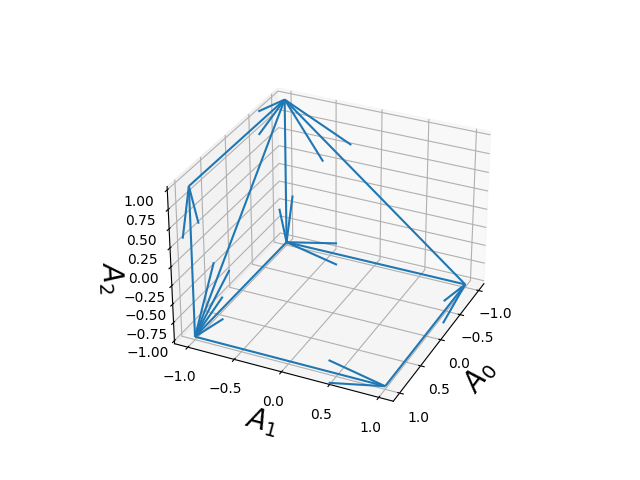

In [225]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$A_0$', fontsize=20)
ax.set_ylabel(r'$A_1$', fontsize=20)
ax.set_zlabel(r'$A_2$', fontsize=20)
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
# ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=25)

for origin, next_ in transitions.items():
# for origin, next_ in tmp_set.items():
    if next_['count'] < 10:
        continue
    target_list = next_['next']
    for target, count in target_list.items():
        if count < 0:
            continue
        ax.quiver(origin[0], origin[1], origin[2], (target[0]-origin[0]), (target[1]-origin[1]), (target[2]-origin[2]), )

In [110]:
"""
tmp_set = type_set2.copy()
tmp_set[(1.0, 1.0, -1.0)] = {'count': 228, 'next': {(-1.0, 1.0, -1.0): 228}}
tmp_set[(-1.0, 1.0, -1.0)] = {'count': 200, 'next': {(-1.0, -1.0, -1.0): 200}}
tmp_set[(-1.0, 1.0, 1.0)] = {'count': 114, 'next': {(1.0, 1.0, -1.0): 114}}
tmp_set[(1.0, -1.0, -1.0)] = {'count': 116, 'next': {(1.0, 1.0, -1.0): 116}}
tmp_set[(-1.0, -1.0, -1.0)] = {'count': 227, 'next': {(1.0, -1.0, -1.0): 115, (1.0, -1.0, 1.0): 112}}
tmp_set[(1.0, -1.0, 1.0)] = {'count': 112, 'next': {(-1.0, -1.0, 1.0): 112}}
tmp_set[(-1.0, -1.0, 1.0)] = {'count': 112, 'next': {(-1.0, 1.0, 1.0): 112}}
tmp_set
"""

"\ntmp_set = type_set2.copy()\ntmp_set[(1.0, 1.0, -1.0)] = {'count': 228, 'next': {(-1.0, 1.0, -1.0): 228}}\ntmp_set[(-1.0, 1.0, -1.0)] = {'count': 200, 'next': {(-1.0, -1.0, -1.0): 200}}\ntmp_set[(-1.0, 1.0, 1.0)] = {'count': 114, 'next': {(1.0, 1.0, -1.0): 114}}\ntmp_set[(1.0, -1.0, -1.0)] = {'count': 116, 'next': {(1.0, 1.0, -1.0): 116}}\ntmp_set[(-1.0, -1.0, -1.0)] = {'count': 227, 'next': {(1.0, -1.0, -1.0): 115, (1.0, -1.0, 1.0): 112}}\ntmp_set[(1.0, -1.0, 1.0)] = {'count': 112, 'next': {(-1.0, -1.0, 1.0): 112}}\ntmp_set[(-1.0, -1.0, 1.0)] = {'count': 112, 'next': {(-1.0, 1.0, 1.0): 112}}\ntmp_set\n"